## Feature Extraction using Autoregressive and Statistical Histogram with difference of a DataFrame 
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import mne
mne.utils.use_log_level('error')

#####  

In [2]:
import glob

path = r'Preprocessed_Data'
all_files = glob.glob(path + "/*_VR.fif")

cols = []
sub = 1
mean, median, std, mode,mean_std,skew,kurto = [],[],[],[],[],[],[]

for filename in all_files:
    raw =  mne.io.read_raw_fif(filename, preload=True,verbose='error');
    if 'CH 4' in raw.info['ch_names']:
        raw.pick_channels(["CH 4"])
      
        picks = mne.pick_types(raw.info, eeg=True, exclude=[])
        
        interval = 5
        start = 60
        stop = start + interval
        while(stop <= 120):
            start1, stop1 = raw.time_as_index([start, stop])
            data, times = raw[picks[:], start1:stop1]
            segment = pd.Series(data[0]).shift(21).dropna()
            
            df_mean = segment.mean()
            mean.append(df_mean)
            
            df_median = segment.median()
            median.append(df_median)
                       
            df_std = segment.std()
            std.append(df_std)
            
            df_skewness = segment.skew()
            skew.append(df_skewness)

            df_kurt = segment.kurt()
            kurto.append(df_kurt)
            
            df_mean_std = df_mean/df_std
            mean_std.append(df_mean_std)            
                       
            start += interval
            stop += interval

            cols.append(sub)
    sub += 1
df1 = pd.DataFrame(data={'Mean':mean, 'Median':median, 'StdDev':std,'Mean/StdDev':mean_std,'Skew':skew,'Kurt':kurto})    

df1.insert(loc=0, column='Subject', value=cols)

In [3]:
df1.head() #Features after AR and Statistical histogram

,Subject,Mean,Median,StdDev,Mean/StdDev,Skew,Kurt
0,1,-0.659793,-1.442718,32.865496,-0.020076,0.241391,0.675793
1,1,0.478695,-0.399089,21.882796,0.021875,-0.033556,-0.123362
2,1,0.091329,1.309226,25.955030,0.003519,-0.014551,0.771149
3,1,0.067336,0.449847,20.045410,0.003359,-0.184843,-0.300295
4,1,0.045020,1.529333,18.930282,0.002378,-0.155793,-0.926476


In [4]:
# Features after 1st difference
df2 = df1.diff().dropna()
df2.head()

,Subject,Mean,Median,StdDev,Mean/StdDev,Skew,Kurt
1,0.0,1.138488,1.043629,-10.982700,0.041951,-0.274947,-0.799155
2,0.0,-0.387366,1.708315,4.072234,-0.018357,0.019005,0.894511
3,0.0,-0.023993,-0.859379,-5.909621,-0.000160,-0.170291,-1.071444
4,0.0,-0.022316,1.079485,-1.115127,-0.000981,0.029049,-0.626182
5,0.0,0.094204,-0.472934,-1.918629,0.005806,-0.003289,0.459630


In [5]:
# Features after 2st difference
df3 = df2.diff().dropna()
df3.head()

,Subject,Mean,Median,StdDev,Mean/StdDev,Skew,Kurt
2,0.0,-1.525854,0.664687,15.054935,-0.060308,0.293952,1.693666
3,0.0,0.363373,-2.567694,-9.981855,0.018197,-0.189296,-1.965954
4,0.0,0.001677,1.938864,4.794493,-0.000821,0.199341,0.445262
5,0.0,0.116520,-1.552420,-0.803501,0.006787,-0.032339,1.085811
6,0.0,-0.366329,-0.254390,7.257362,-0.019936,0.666739,2.923799


In [6]:
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df3.reset_index(drop=True, inplace=True)

In [7]:
# Cobnining all 3 different features
df = pd.concat([df1, df2, df3], axis=1)

In [8]:
df.dropna(inplace=True)
df.columns = df.columns = ['Subject', 'Mean', 'Median', 'StdDev', 'Mean/StdDev', 'Skew', 'Kurt',
       'Subject1', 'Mean1', 'Median1', 'StdDev1', 'Mean/StdDev1', 'Skew1', 'Kurt1',
       'Subject2', 'Mean2', 'Median2', 'StdDev2', 'Mean/StdDev2', 'Skew2', 'Kurt2']
df.drop(['Subject1','Subject2'], axis=1, inplace=True)
df

,Subject,Mean,Median,StdDev,Mean/StdDev,Skew,Kurt,Mean1,Median1,StdDev1,Mean/StdDev1,Skew1,Kurt1,Mean2,Median2,StdDev2,Mean/StdDev2,Skew2,Kurt2
0,1,-0.659793,-1.442718,32.865496,-0.020076,0.241391,0.675793,1.138488,1.043629,-10.982700,0.041951,-0.274947,-0.799155,-1.525854,0.664687,15.054935,-0.060308,0.293952,1.693666
1,1,0.478695,-0.399089,21.882796,0.021875,-0.033556,-0.123362,-0.387366,1.708315,4.072234,-0.018357,0.019005,0.894511,0.363373,-2.567694,-9.981855,0.018197,-0.189296,-1.965954
2,1,0.091329,1.309226,25.955030,0.003519,-0.014551,0.771149,-0.023993,-0.859379,-5.909621,-0.000160,-0.170291,-1.071444,0.001677,1.938864,4.794493,-0.000821,0.199341,0.445262
3,1,0.067336,0.449847,20.045410,0.003359,-0.184843,-0.300295,-0.022316,1.079485,-1.115127,-0.000981,0.029049,-0.626182,0.116520,-1.552420,-0.803501,0.006787,-0.032339,1.085811
4,1,0.045020,1.529333,18.930282,0.002378,-0.155793,-0.926476,0.094204,-0.472934,-1.918629,0.005806,-0.003289,0.459630,-0.366329,-0.254390,7.257362,-0.019936,0.666739,2.923799
5,1,0.139224,1.056398,17.011654,0.008184,-0.159083,-0.466847,-0.272125,-0.727325,5.338733,-0.014130,0.663450,3.383429,0.232725,-0.093000,-6.531025,0.011933,-1.203820,-6.827925
6,1,-0.132901,0.329073,22.350387,-0.005946,0.504367,2.916582,-0.039400,-0.820324,-1.192292,-0.002197,-0.540371,-3.444496,0.196127,1.470033,2.387246,0.009644,0.401825,3.219743
7,1,-0.172300,-0.491251,21.158095,-0.008143,-0.036004,-0.527914,0.156727,0.649709,1.194954,0.007447,-0.138545,-0.224753,0.319679,-0.115945,-2.485870,0.015130,0.135517,0.305353
8,1,-0.015573,0.158457,22.353049,-0.000697,-0.174549,-0.752667,0.476407,0.533764,-1.290916,0.022576,-0.003029,0.080600,-0.897319,-0.460642,-1.209207,-0.042305,0.142534,0.229313
9,1,0.460834,0.692221,21.062133,0.021880,-0.177578,-0.672067,-0.420912,0.073122,-2.500123,-0.019729,0.139505,0.309913,0.315362,1.366916,7.146404,0.014750,-0.350229,0.283959


In [9]:
df.columns

Index(['Subject', 'Mean', 'Median', 'StdDev', 'Mean/StdDev', 'Skew', 'Kurt',
       'Mean1', 'Median1', 'StdDev1', 'Mean/StdDev1', 'Skew1', 'Kurt1',
       'Mean2', 'Median2', 'StdDev2', 'Mean/StdDev2', 'Skew2', 'Kurt2'],
      dtype='object')

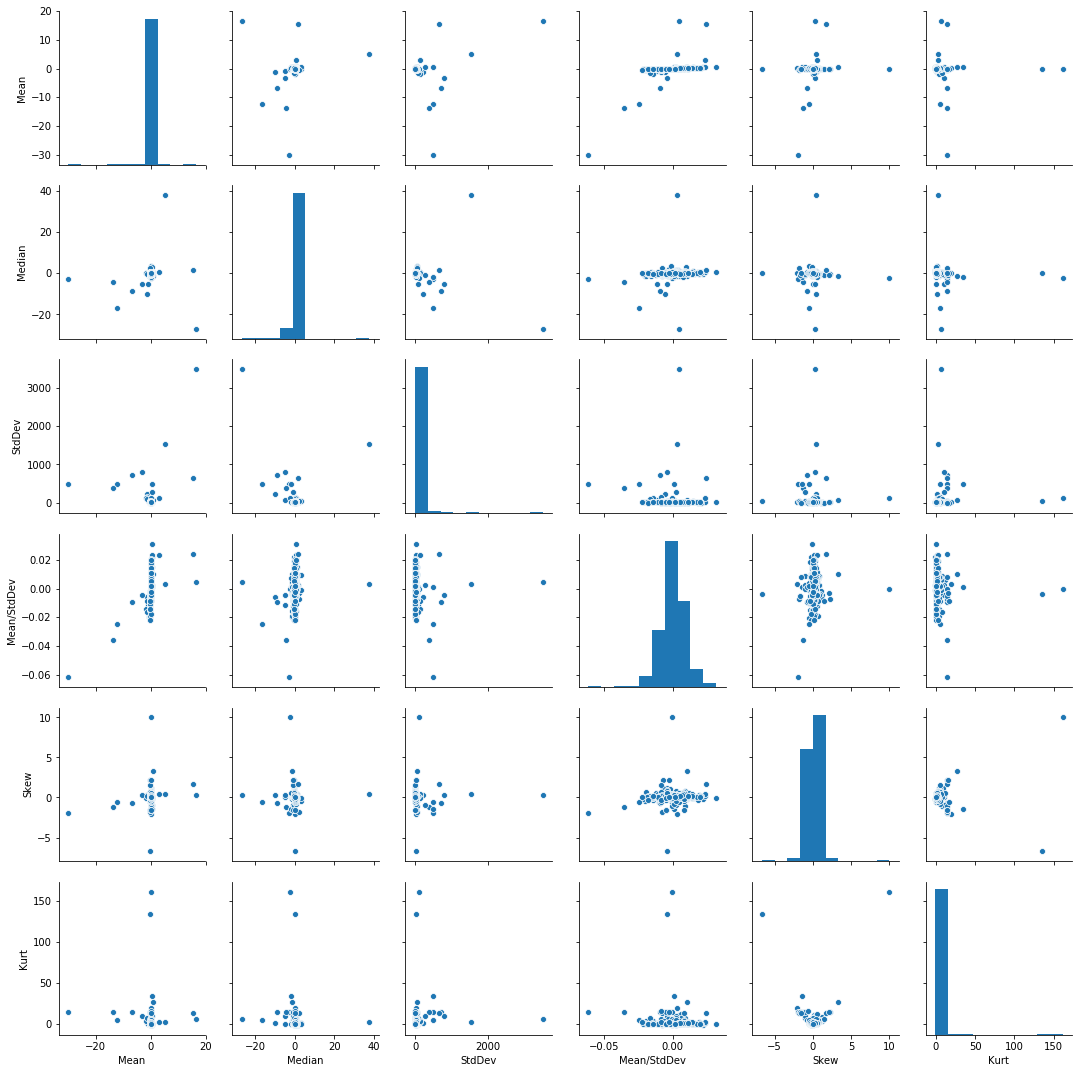

In [10]:
import seaborn as sns
sns_plot = sns.pairplot(df1.drop('Subject', axis=1))
sns_plot.savefig('features_plot.png')

## Dichotomizer

In [11]:
import itertools

In [12]:
subs = df['Subject'].unique()    # All subjects
all_subs= list(itertools.combinations(subs, 2)) # All possible combination for all subjects

col = ['Subject', 'Mean', 'Median', 'StdDev','Mean/StdDev','Skew','Kurt',
       'Mean1', 'Median1', 'StdDev1', 'Mean/StdDev1', 'Skew1', 'Kurt1',
       'Mean2', 'Median2', 'StdDev2', 'Mean/StdDev2', 'Skew2', 'Kurt2','Type']

features = ['Mean', 'Median', 'StdDev','Mean/StdDev','Skew','Kurt',
       'Mean1', 'Median1', 'StdDev1', 'Mean/StdDev1', 'Skew1', 'Kurt1',
       'Mean2', 'Median2', 'StdDev2', 'Mean/StdDev2', 'Skew2', 'Kurt2']
intra_data = pd.DataFrame(columns = col)

#Intra Distance Computation (Same Person)
for sub in subs:
    rows = df.loc[df['Subject'] == sub]
    each_comb = list(itertools.combinations(rows.index, 2))
    for i in range(len(each_comb)):
        comb = each_comb[i]
        r=0
        fdr = [None]*18
        for feature in features:
            f1= df.iloc[comb[0]][feature]
            f2 = df.iloc[comb[1]][feature]
            Intra_dis = np.absolute(f1-f2) # absolute difference formula
            fdr[r] = Intra_dis
            r+=1
        intra_data = intra_data.append(pd.Series([sub,fdr[0],fdr[1],fdr[2],fdr[3],fdr[4],fdr[5],fdr[6],
                                                  fdr[7],fdr[8],fdr[9],fdr[10],fdr[11],fdr[12],fdr[13],fdr[14],
                                                  fdr[15],fdr[16], fdr[17],0], index=col), ignore_index=True)

In [13]:
col = ['Subjects', 'Mean', 'Median', 'StdDev','Mean/StdDev','Skew','Kurt', 
                   'Mean1', 'Median1', 'StdDev1', 'Mean/StdDev1', 'Skew1', 'Kurt1',
                   'Mean2', 'Median2', 'StdDev2', 'Mean/StdDev2', 'Skew2', 'Kurt2','Type']
inter_data = pd.DataFrame(columns = col)

# Inter Distance Computation (Different Person) 
all_rows=len(df)
for sub_pair in all_subs: # Pairs of subjets
    sp1 = df.loc[df['Subject'] == sub_pair[0]].index
    sp2 = df.loc[df['Subject'] == sub_pair[1]].index
    for i in range(len(sp1)):
        for j in range(len(sp2)):
            r=0
            fdr = [None]*18
            for feature in features:
                f1 = df.iloc[sp1[i]][feature] 
                f2 = df.iloc[sp2[j]][feature] 
                Inter_dis = np.absolute(f1-f2) # absolute difference formula
                fdr[r] = Inter_dis
                r+=1
            inter_data = inter_data.append(pd.Series([sub_pair, fdr[0],fdr[1],fdr[2],fdr[3],fdr[4],fdr[5],fdr[6],
                                                  fdr[7],fdr[8],fdr[9],fdr[10],fdr[11],fdr[12],fdr[13],fdr[14],
                                                  fdr[15],fdr[16], fdr[17], 1], index=col), ignore_index=True)

In [14]:
print("Intra length: "+str(len(intra_data)))
print("Inter length: "+str(len(inter_data)))

Intra length: 1893
Inter length: 57792


In [15]:
intra_data

,Subject,Mean,Median,StdDev,Mean/StdDev,Skew,Kurt,Mean1,Median1,StdDev1,Mean/StdDev1,Skew1,Kurt1,Mean2,Median2,StdDev2,Mean/StdDev2,Skew2,Kurt2,Type
0,1.0,1.138488,1.043629,10.982700,0.041951,0.274947,0.799155,1.525854,0.664687,15.054935,0.060308,0.293952,1.693666,1.889227,3.232381,25.036790,0.078505,0.483248,3.659620,0.0
1,1.0,0.751122,2.751944,6.910466,0.023594,0.255942,0.095356,1.162481,1.903008,5.073080,0.042111,0.104656,0.272289,1.527531,1.274178,10.260442,0.059486,0.094611,1.248404,0.0
2,1.0,0.727129,1.892565,12.820086,0.023435,0.426234,0.976088,1.160804,0.035857,9.867573,0.042932,0.303996,0.172973,1.642374,2.217107,15.858436,0.067094,0.326291,0.607854,0.0
3,1.0,0.704813,2.972051,13.935214,0.022454,0.397184,1.602269,1.044283,1.516563,9.064072,0.036145,0.271658,1.258785,1.159524,0.919077,7.797573,0.040371,0.372787,1.230133,0.0
4,1.0,0.799017,2.499116,15.853842,0.028260,0.400474,1.142639,1.410613,1.770953,16.321433,0.056081,0.938397,4.182584,1.758579,0.757686,21.585960,0.072241,1.497772,8.521590,0.0
5,1.0,0.526892,1.771791,10.515109,0.014129,0.262976,2.240789,1.177887,1.863953,9.790408,0.044148,0.265424,2.645341,1.721981,0.805346,12.667689,0.069952,0.107874,1.526077,0.0
6,1.0,0.487493,0.951467,11.707401,0.011932,0.277395,1.203707,0.981760,0.393920,12.177654,0.034504,0.136402,0.574402,1.845533,0.780632,17.540804,0.075437,0.158435,1.388313,0.0
7,1.0,0.644220,1.601176,10.512447,0.019379,0.415940,1.428459,0.662081,0.509865,9.691784,0.019375,0.271919,0.879755,0.628535,1.125328,16.264142,0.018002,0.151418,1.464352,0.0
8,1.0,1.120627,2.134939,11.803363,0.041955,0.418969,1.347860,1.559400,0.970507,8.482577,0.061680,0.414452,1.109068,1.841216,0.702229,7.908531,0.075058,0.644181,1.409707,0.0
9,1.0,0.699715,2.208061,14.303486,0.022226,0.279463,1.037946,1.244038,0.396409,15.628981,0.046929,0.064224,1.393027,1.557132,4.671931,28.207314,0.058598,0.221643,2.752769,0.0


In [16]:
inter_data

,Subjects,Mean,Median,StdDev,Mean/StdDev,Skew,Kurt,Mean1,Median1,StdDev1,Mean/StdDev1,Skew1,Kurt1,Mean2,Median2,StdDev2,Mean/StdDev2,Skew2,Kurt2,Type
0,"(1, 2)",0.519892,1.080892,18.163303,0.010560,0.185315,0.909305,1.393379,1.883636,16.785720,0.051689,0.922365,5.146413,2.776945,2.025434,22.227300,0.120727,1.754623,10.282858,1
1,"(1, 2)",0.265001,0.240885,12.360284,0.000822,0.462103,3.437952,0.142288,0.806484,9.613354,0.008731,0.538306,3.442780,0.137124,2.573505,15.526572,0.023154,0.361633,4.446099,1
2,"(1, 2)",1.261201,2.090998,13.729630,0.051504,0.351149,0.803982,1.805266,1.102334,40.194861,0.074731,0.117279,2.696985,2.092752,2.335188,71.788360,0.086506,0.246941,5.121576,1
3,"(1, 2)",0.594423,2.032292,15.482531,0.018723,0.508818,1.093847,1.238368,2.772836,16.538564,0.048533,0.658172,0.730925,1.831049,3.072328,10.727960,0.076923,0.883379,0.726831,1
4,"(1, 2)",0.494542,0.303085,12.038734,0.012141,0.125593,0.436233,0.933173,0.964179,9.244330,0.031918,0.068745,0.235909,1.112796,3.190018,16.771665,0.037450,0.025733,1.163181,1
5,"(1, 2)",0.699858,2.310893,13.777104,0.022174,0.331795,0.999479,1.346230,1.561152,7.527600,0.054776,0.336964,0.766394,1.799168,1.013866,12.044836,0.077135,0.232492,1.349701,1
6,"(1, 2)",0.492115,1.793370,17.232204,0.009350,0.269779,1.032240,1.072916,1.910332,10.537699,0.037948,0.398424,1.110358,1.672750,0.768627,2.687239,0.066425,2.513100,17.279653,1
7,"(1, 2)",0.557687,0.926667,17.677205,0.013353,0.146302,0.721037,0.926020,0.477018,28.279873,0.031831,1.820724,20.083677,1.177181,1.942991,51.020261,0.044920,3.963532,40.332509,1
8,"(1, 2)",0.770155,1.493277,0.380032,0.023473,2.241974,18.563485,1.274692,1.755323,7.685453,0.047219,2.436760,18.555167,1.596211,0.532048,3.281499,0.060646,2.796192,17.901900,1
9,"(1, 2)",0.633950,0.781583,19.048186,0.018205,0.080161,0.790837,1.204335,0.558589,10.650980,0.046880,0.065481,1.040399,1.922677,1.234397,12.938201,0.087705,0.204575,1.422962,1


In [17]:
print(len(intra_data), len(inter_data)) # for 60 to 120 data with 5 segment data.

1893 57792


In [18]:
subF1 = pd.DataFrame(columns = col)
subF2 = pd.DataFrame(columns = col)
subF3 = pd.DataFrame(columns = col)

for i in range(len(intra_data)):
    if(i%3==0):
        subF1 = subF1.append(intra_data.iloc[i],ignore_index=True)
    if(i%3==1):
        subF2 = subF2.append(intra_data.iloc[i],ignore_index=True)
    if(i%3==2):
        subF3 = subF3.append(intra_data.iloc[i],ignore_index=True)
        
for i in range(len(inter_data)):
    if(i%3==0):
        subF1 = subF1.append(inter_data.iloc[i],ignore_index=True)
    if(i%3==1):
        subF2 = subF2.append(inter_data.iloc[i],ignore_index=True)
    if(i%3==2):
        subF3 = subF3.append(inter_data.iloc[i],ignore_index=True)

In [19]:
print(len(subF1),len(subF2),len(subF3))

19895 19895 19895


In [20]:
import random

def get_svm_table(subF):
    
    svm = pd.DataFrame(columns = col)
    
    rands = random.sample(range(0, 1635), 1600)
    for rand in rands:
        svm = svm.append(subF.iloc[rand],ignore_index=True)

    rands = random.sample(range(1635, 4200), 2400)
    for rand in rands:
        svm = svm.append(subF.iloc[rand],ignore_index=True)
    
    return svm

In [21]:
svm_data1 = get_svm_table(subF1)
svm_data2 = get_svm_table(subF2)
svm_data3 = get_svm_table(subF3)

In [22]:
print(len(svm_data1),len(svm_data2),len(svm_data3))

4000 4000 4000


# SVM

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [27]:
def svm(svm_data):
    X = svm_data.drop(['Type', 'Subjects','Subject'], axis=1)
    y = svm_data['Type']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

    model = SVC(C=1.0, kernel='rbf', degree=3, gamma=0.1)
    model.fit(X_train, y_train)

    prediction = model.predict(X_test)
    
    print(confusion_matrix(y_test, prediction))
    print(classification_report(y_test, prediction))
    print("Accuracy :",accuracy_score(y_test, prediction),'\n')
    

In [26]:
print('------------------ First Table: --------------------- \n')
svm(svm_data1)

print('------------------ Second Table: -------------------- \n')
svm(svm_data2)

print('------------------- Third Table: -------------------- \n')
svm(svm_data3)

print('---------------  All Tables Together -------------------------')
all_svm = pd.concat([svm_data1,svm_data2,svm_data3])
svm(all_svm)

First Table: 

[[  52  121]
 [  14 1013]]
              precision    recall  f1-score   support

         0.0       0.79      0.30      0.44       173
         1.0       0.89      0.99      0.94      1027

   micro avg       0.89      0.89      0.89      1200
   macro avg       0.84      0.64      0.69      1200
weighted avg       0.88      0.89      0.87      1200

Accuracy : 0.8875
Second Table: 

[[  32  145]
 [  19 1004]]
              precision    recall  f1-score   support

         0.0       0.63      0.18      0.28       177
         1.0       0.87      0.98      0.92      1023

   micro avg       0.86      0.86      0.86      1200
   macro avg       0.75      0.58      0.60      1200
weighted avg       0.84      0.86      0.83      1200

Accuracy : 0.8633333333333333
Third Table:

[[ 48 129]
 [ 30 993]]
              precision    recall  f1-score   support

         0.0       0.62      0.27      0.38       177
         1.0       0.89      0.97      0.93      1023

   micro avg

##### Precision Score
TP – True Positives
FP – False Positives

Precision – Accuracy of positive predictions.
Precision = TP/(TP + FP)

##### Recall Score
FN – False Negatives

Recall (aka sensitivity or true positive rate): Fraction of positives That were correctly identified.
Recall = TP/(TP+FN)


##### F1 Score
F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers. F1 Score takes into account precision and the recall. It is created by finding the the harmonic mean of precision and recall.

F1 = 2 x (precision x recall)/(precision + recall)
